## **GROUP ASSIGNMENT 1**

| Name      | UOW ID |
| ----------- | ----------- |
| Calaunan Alexander Jr Sumampong      | 7559161       |
| Deon Cham Hui Ern   | 7559471        |
| Elroy Chua Ming Xuan | 7431673 |
| Gonzales Raizel Vera Marie L. | 7436634 |


In [2]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read the data file
df = pd.read_csv('data.csv')

# Be able to see all the columns
pd.set_option('display.max_columns', None)

# see the first 20 columns
df.head(20)

/var/folders/bt/vkg37vm51db7424mjftzw2700000gn/T/ipykernel_12323/2113178754.py:2: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,zid,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,01-12-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,01-01-1985,1,NaN,NaN,3,0,13648,83.70,9,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,01-01-2015,171.62,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,01-12-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,01-04-1999,5,NaN,NaN,3,0,1687,9.40,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,01-04-2013,119.66,NaN,01-09-2013,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,01-12-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0,01-11-2001,2,NaN,NaN,2,0,2956,98.50,10,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,01-06-2014,649.91,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,01-02-1996,1,35.0,NaN,10,0,5598,21.00,37,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.0000,01-01-2015,357.48,NaN,01-01-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,01-01-1996,0,38.0,NaN,15,0,27783,53.90,38,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,01-01-2016,67.79,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,01-12-2011,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,01-11-2004,3,NaN,NaN,9,0,7963,28.30,12,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,01-01-2015,161.03,NaN,01-09-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,01-12-2011,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,01-07-2005,1,NaN,NaN,7,0,17726,85.60,11,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.0000,01-01-2016,170.08,01-02-2016,01-01-2016,0.0,NaN,

### Look for all the NaN values

In [4]:
null_count_ser = pd.isnull(df).sum()
print(null_count_ser)

zid                      0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64


In [5]:
# Show all columns that have missing values
df.isnull().sum()

zid                      0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

### Drop all columns with more than 50% null values

In [6]:
## Drop the columns with more than 50% missing values
# See initial shape of the dataframe
print(df.shape)

# Get the columns with more than 50% missing values
columns_to_drop = null_count_ser[null_count_ser > 0.5 * df.shape[0]].index

# Drop the columns
df.drop(columns_to_drop, axis=1, inplace=True)

# Check the shape of the dataframe
print(df.shape)

(855969, 73)
(855969, 52)


## CHANGES TO MAKE FOR OUR COLUMNS

### Drop other columns that are redundant
- emp_title
- title(?) ask tutor
- zip_code(?) ask tutor

In [7]:
# Drop redundant columns:
# See initial shape of the dataframe
print(df.shape)

# drop emp_title, title, zip_code
df.drop(['emp_title', 'title', 'zip_code'], axis=1, inplace=True)

# Check the shape of the dataframe
print(df.shape)


(855969, 52)
(855969, 49)


## Columns to encode/change/normalise(?)
- dti: divide by 100, to make it 0.0 to 1.0, then perhaps group into bins (depends on stdev)
- earliest_cr_line: str to date

### Having a look at columns and their values:

In [8]:
# see all the values of 'title'
# df['title'].value_counts()

In [9]:
# ordinal data 
# see all the values of 'emp_length'
df['emp_length'].value_counts()

emp_length
10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: count, dtype: int64

In [10]:
# ordinal 
# see all the values of 'grade'
df['grade'].value_counts()

grade
B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: count, dtype: int64

In [11]:
# ordinal 
# see all the values of 'sub_grade'
df['sub_grade'].value_counts()

sub_grade
B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: count, dtype: int64

In [12]:
# nominal data 
# see all the values of 'home_ownership'
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: count, dtype: int64

In [13]:
# norminal data 
# see all the values of 'verification_status'
df['verification_status'].value_counts()

verification_status
Source Verified    318178
Verified           280049
Not Verified       257742
Name: count, dtype: int64

In [14]:
# nominal data 
# see all the values of 'application_type'
df['application_type'].value_counts()

application_type
INDIVIDUAL    855527
JOINT            442
Name: count, dtype: int64

In [15]:
# nominal 
# see all the values of 'pymnt_plan'
df['pymnt_plan'].value_counts()

pymnt_plan
n    855964
y         5
Name: count, dtype: int64

In [16]:
# nominal data 
# see all the values of 'purpose'
df['purpose'].value_counts()

purpose
debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: count, dtype: int64

In [17]:
# nominal 
# see all the values of 'addr_state'
df['addr_state'].value_counts()

addr_state
CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: count, dtype: int64

## NORMALIZING/ENCODING THE DATA
- term: change months to int
- grade: A to 1, B to 2, etc.
- subgrade: A1 to 1.1, B2, to 2.2, C5 to 3.5, etc.
- emp_length: 0 - 10 (mapping shown below)
- home_ownership: 0 - 5 (mapping shown below)
- verification status: 0 - 2 (mappint shown below)
- pymnt_plan: 0, 1 (n, y)
- addr_state: 0-50
- initial_list_status: 

dates:
- issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d

In [18]:
# Change the values of 'term' into integers
df['term'] = df['term'].str.replace('months', '').astype(int)

In [19]:
# Change the values of emp_length into integers
# Create a mapping dictionary for encoding
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0,  # For "< 1 year", assigning 0 to represent less than 1 year of employment
}

# Perform encoding using the mapping dictionary
df['emp_length'] = df['emp_length'].map(emp_length_mapping)


In [20]:
# Change the values of 'grade' into integers
# Create a mapping dictionary for ordinal encoding
grade_mapping = {
    'G': 7,
    'F': 6,
    'E': 5,
    'D': 4,
    'C': 3,
    'B': 2,
    'A': 1,
}

# Perform encoding using the mapping dictionary
df['grade'] = df['grade'].map(grade_mapping)

In [21]:
# Change the values of 'sub_grade' into floating-point numbers
# Create a mapping dictionary for encoding subgrades to floating-point values
sub_grade_mapping = {
    'A1': 1.1,
    'A2': 1.2,
    'A3': 1.3,
    'A4': 1.4,
    'A5': 1.5,
    'B1': 2.1,
    'B2': 2.2,
    'B3': 2.3,
    'B4': 2.4,
    'B5': 2.5,
    'C1': 3.1,
    'C2': 3.2,
    'C3': 3.3,
    'C4': 3.4,
    'C5': 3.5,
    'D1': 4.1,
    'D2': 4.2,
    'D3': 4.3,
    'D4': 4.4,
    'D5': 4.5,
    'E1': 5.1,
    'E2': 5.2,
    'E3': 5.3,
    'E4': 5.4,
    'E5': 5.5,
    'F1': 6.1,
    'F2': 6.2,
    'F3': 6.3,
    'F4': 6.4,
    'F5': 6.5,
    'G1': 7.1,
    'G2': 7.2,
    'G3': 7.3,
    'G4': 7.4,
    'G5': 7.5,
}

# Perform encoding using the mapping dictionary
df['sub_grade'] = df['sub_grade'].map(sub_grade_mapping)


In [22]:
# send to do one-hot encoding instead! 

# Change the values of 'home_ownership' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
home_ownership_mapping = {
    'NONE': 0,
    'ANY': 1,
    'OTHER': 2,
    'OWN': 3,
    'RENT': 4,
    'MORTGAGE': 5,
}

# Perform encoding using the mapping dictionary
df['home_ownership'] = df['home_ownership'].map(home_ownership_mapping)


In [23]:
# send to do one-hot encoding instead! 

# Change the values of 'verification_status' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
verification_status_mapping = {
    'Not Verified': 0,
    'Source Verified': 1,
    'Verified': 2,
}

# Perform encoding using the mapping dictionary
df['verification_status'] = df['verification_status'].map(verification_status_mapping)

In [24]:
# send to do one-hot encoding instead! 

# Change the values of 'pymnt_plan' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
pymnt_plan_mapping = {
    'n': 0,
    'y': 1,
}

# Perform encoding using the mapping dictionary
df['pymnt_plan'] = df['pymnt_plan'].map(pymnt_plan_mapping)

In [25]:
# send to do one-hot encoding instead! 

# Change the values of 'purpose' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
purpose_mapping = {
    'educational': 0,
    'small_business': 1,
    'renewable_energy': 2,
    'wedding': 3,
    'moving': 4,
    'house': 5,
    'vacation': 6,
    'medical': 7,
    'car': 8,
    'major_purchase': 9,
    'credit_card': 10,
    'home_improvement': 11,
    'debt_consolidation': 12,
    'other': 13,
}

# Perform encoding using the mapping dictionary
df['purpose'] = df['purpose'].map(purpose_mapping)

In [26]:
# send to do one-hot encoding instead! 

# Change the values of 'addr_state' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
addr_state_mapping = {
    'IA': 0,
    'NE': 1,
    'ID': 2,
    'ME': 3,
    'ND': 4,
    'SD': 5,
    'WV': 6,
    'VT': 7,
    'WY': 8,
    'MT': 9,
    'AR': 10,
    'RI': 11,
    'MS': 12,
    'KS': 13,
    'NM': 14,
    'DE': 15,
    'NH': 16,
    'AK': 17,
    'HI': 18,
    'DC': 19,
    'WY': 20,
    'UT': 21,
    'NV': 22,
    'OR': 23,
    'CO': 24,
    'TN': 25,
    'CT': 26,
    'KY': 27,
    'AL': 28,
    'OK': 29,
    'LA': 30,
    'WI': 31,
    'SC': 32,
    'MD': 33,
    'AZ': 34,
    'MO': 35,
    'MN': 36,
    'MA': 37,
    'NJ': 38,
    'MI': 39,
    'VA': 40,
    'WA': 41,
    'NC': 42,
    'GA': 43,
    'IL': 44,
    'PA': 45,
    'OH': 46,
    'NY': 47,
    'TX': 48,
    'FL': 49,
    'CA': 50,
}

# Perform encoding using the mapping dictionary
df['addr_state'] = df['addr_state'].map(addr_state_mapping)

In [27]:
# Change the values of 'initial_list_status' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
initial_list_status_mapping = {
    'f': 0,
    'w': 1,
}

# Perform encoding using the mapping dictionary
df['initial_list_status'] = df['initial_list_status'].map(initial_list_status_mapping)

In [28]:
# Change the values of 'application_type' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
application_type_mapping = {
    'INDIVIDUAL': 0,
    'JOINT': 1,
}

# Perform encoding using the mapping dictionary
df['application_type'] = df['application_type'].map(application_type_mapping)

#### Now change all the dates (currently str) to date type

**NOTE:** not sure whether want to extract the year only from the date and use that for correlation

In [29]:
# issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d

# Chnage the type of 'issue_d' to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])
# Extract the year from 'issue_d'
# df['issue_d'] = df['issue_d'].dt.year

# Change the type of 'earliest_cr_line' to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
# Extract the year from 'earliest_cr_line'
# df['earliest_cr_line'] = df['earliest_cr_line'].dt.year

# Change the type of 'last_pymnt_d' to datetime
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
# Extract the year from 'last_pymnt_d'
# df['last_pymnt_d'] = df['last_pymnt_d'].dt.year

# Change the type of 'next_pymnt_d' to datetime
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'])
# Extract the year from 'next_pymnt_d'
# df['next_pymnt_d'] = df['next_pymnt_d'].dt.year

# Change the type of 'last_credit_pull_d' to datetime
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])
# Extract the year from 'last_credit_pull_d'
# df['last_credit_pull_d'] = df['last_credit_pull_d'].dt.year


### (MAYBE) Imputation of null values using mean imputation

In [30]:
# Imputations
# Check the number of missing values in each column
df.isnull().sum()


zid                                0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
addr_state                     13348
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
i

In [31]:
# use SimpleImputer to impute the missing values for the missing values in all the columns
from sklearn.impute import SimpleImputer

# Create an imputer object with a mean filling strategy
mean_imputer = SimpleImputer(strategy='median')

# Impute the missing values with mean imputation
df['emp_length'] = mean_imputer.fit_transform(df[['emp_length']])
df['addr_state'] = mean_imputer.fit_transform(df[['addr_state']])
df['revol_util'] = mean_imputer.fit_transform(df[['revol_util']])
df['last_pymnt_d'] = mean_imputer.fit_transform(df[['last_pymnt_d']])
df['next_pymnt_d'] = mean_imputer.fit_transform(df[['next_pymnt_d']])
df['last_credit_pull_d'] = mean_imputer.fit_transform(df[['last_credit_pull_d']])
df['collections_12_mths_ex_med'] = mean_imputer.fit_transform(df[['collections_12_mths_ex_med']])
df['tot_coll_amt'] = mean_imputer.fit_transform(df[['tot_coll_amt']])
df['tot_cur_bal'] = mean_imputer.fit_transform(df[['tot_cur_bal']])
df['total_rev_hi_lim'] = mean_imputer.fit_transform(df[['total_rev_hi_lim']])


In [32]:
df.isnull().sum()

zid                           0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

In [33]:
# check stuff
df.head(20)

,zid,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,2,2.2,10.0,4,24000.00,2,2011-01-12,0,10,34.0,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,1.420070e+18,171.62,-9.223372e+18,1.451606e+18,0.0,1,0,0,0.0,81008.5,23800.0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3,3.4,0.0,4,30000.00,1,2011-01-12,0,8,43.0,1.00,0,1999-01-04,5,3,0,1687,9.40,4,0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,1.357258e+18,119.66,-9.223372e+18,1.357690e+18,0.0,1,0,0,0.0,81008.5,23800.0,1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,3,3.5,10.0,4,12252.00,0,2011-01-12,0,1,44.0,8.72,0,2001-01-11,2,2,0,2956,98.50,10,0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,1.388966e+18,649.91,-9.223372e+18,1.451606e+18,0.0,1,0,0,0.0,81008.5,23800.0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,3,3.1,10.0,4,49200.00,1,2011-01-12,0,13,50.0,20.00,0,1996-01-02,1,10,0,5598,21.00,37,0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.0000,1.420070e+18,357.48,-9.223372e+18,1.420070e+18,0.0,1,0,0,0.0,81008.5,23800.0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,2,2.5,1.0,4,80000.00,1,2011-01-12,0,13,23.0,17.94,0,1996-01-01,0,15,0,27783,53.90,38,0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,1.451606e+18,67.79,1.451693e+18,1.451606e+18,0.0,1,0,0,0.0,81008.5,23800.0,0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,1,1.4,3.0,4,36000.00,1,2011-01-12,0,3,34.0,11.20,0,2004-01-11,3,9,0,7963,28.30,12,0,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,1.420070e+18,161.03,-9.223372e+18,1.420762e+18,0.0,1,0,0,0.0,81008.5,23800.0,0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,3,3.5,8.0,4,47004.00,0,2011-01-12,0,12,42.0,23.51,0,2005-01-07,1,7,0,17726,85.60,11,0,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.0000,1.451606e+18,170.08,1.451693e+18,1.451606e+18,0.0,1,0,0,0.0,81008.5,23800.0,0
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,5,5.1,9.0,4,48000.00,1,2011-01-12,0,8,50.0,5.35,0,2007-01-01,2,4,0,8221,87.50,4,0,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.0000,1.420070e+18,111.34,-9.223372e+18,1.389485e+18,0.0,1,0,0,0.0,81008.5,23800.0,0
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,6,6.2,4.0,3,40000.00,1,2011-01-12,0,1,50.0,5.55,0,2004-01-04,2,11,0,5210,32.60,13,0,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,1.325635e+18,152.39,-9.223372e+18,1.325981e+18,0.0,1,0,0,0.0,81008.5,23800.0,1
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,2,2.5,0.0,4,15000.00,2,2011-01-12,0,13,48.0,18.08,0,2004-01-09,0,2,0,9279,36.50,3,0,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,1.326240e+18,121.45,-9.223372e+18,1.357171e+18,0.0,1,0,0,0.0,81008.5,23800.0,1


In [34]:
# see all the rows with 'total_coll_amt' column not null
# df['dti_join'].notnull()

## NOW ALL ENCODING AND PRERPROCESSING IS DONE, LESKGO CORRELATION MAP WOOO

In [35]:
# Check data types of all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   zid                         855969 non-null  int64         
 1   member_id                   855969 non-null  int64         
 2   loan_amnt                   855969 non-null  int64         
 3   funded_amnt                 855969 non-null  int64         
 4   funded_amnt_inv             855969 non-null  float64       
 5   term                        855969 non-null  int64         
 6   int_rate                    855969 non-null  float64       
 7   installment                 855969 non-null  float64       
 8   grade                       855969 non-null  int64         
 9   sub_grade                   855969 non-null  float64       
 10  emp_length                  855969 non-null  float64       
 11  home_ownership              855969 non-

In [36]:
df.head()

,zid,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,2,2.2,10.0,4,24000.0,2,2011-01-12,0,10,34.0,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,1.420070e+18,171.62,-9.223372e+18,1.451606e+18,0.0,1,0,0,0.0,81008.5,23800.0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3,3.4,0.0,4,30000.0,1,2011-01-12,0,8,43.0,1.00,0,1999-01-04,5,3,0,1687,9.4,4,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,1.357258e+18,119.66,-9.223372e+18,1.357690e+18,0.0,1,0,0,0.0,81008.5,23800.0,1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,3,3.5,10.0,4,12252.0,0,2011-01-12,0,1,44.0,8.72,0,2001-01-11,2,2,0,2956,98.5,10,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,1.388966e+18,649.91,-9.223372e+18,1.451606e+18,0.0,1,0,0,0.0,81008.5,23800.0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,3,3.1,10.0,4,49200.0,1,2011-01-12,0,13,50.0,20.00,0,1996-01-02,1,10,0,5598,21.0,37,0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,1.420070e+18,357.48,-9.223372e+18,1.420070e+18,0.0,1,0,0,0.0,81008.5,23800.0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,2,2.5,1.0,4,80000.0,1,2011-01-12,0,13,23.0,17.94,0,1996-01-01,0,15,0,27783,53.9,38,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,1.451606e+18,67.79,1.451693e+18,1.451606e+18,0.0,1,0,0,0.0,81008.5,23800.0,0


In [37]:
from scipy.stats import pointbiserialr
import scipy.stats

# Assuming 'df' is your DataFrame with all the features and the target attribute

# List of numerical features for Pearson correlation
numerical_features = [
    'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length',
    'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
    'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
    'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
    'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
]

# List of categorical features for point-biserial correlation
categorical_features = [
    'grade', 'sub_grade', 'emp_length', 'verification_status', 'pymnt_plan', 'purpose',
    'delinq_2yrs', 'initial_list_status', 'policy_code', 'application_type'
]

# # Compute Cramer's V correlations with the target attribute for categorical features
# Define Cramer's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Compute Cramer's V for all the categorical features
cramers_v_features = pd.Series(index=categorical_features)
for column in categorical_features:
    cramers_v_features[column] = cramers_v(df[column], df['default_ind'])

# Compute point-biserial correlations with the target attribute for numerical features
point_biserial_correlations = pd.Series(index=numerical_features)
for column in numerical_features:
    point_biserial_correlations[column] = pointbiserialr(df[column], df['default_ind'])[0]

# Sort the correlations in descending order
cramers_v_features_sorted = cramers_v_features.sort_values(ascending=False)
point_biserial_correlations_sorted = point_biserial_correlations.sort_values(ascending=False)

# Display the sorted results
print("\nPoint-Biserial Correlations (sorted):")
print(point_biserial_correlations_sorted)

# Display the sorted results
print("\nCramer's V Correlation (sorted):")
print(cramers_v_features_sorted)

# Combine the results into a single DataFrame
all_correlations = pd.concat([point_biserial_correlations_sorted, cramers_v_features_sorted])
all_correlations = all_correlations.sort_values(ascending=False)

print("\nAll Correlations (sorted):")
print(all_correlations)

/var/folders/bt/vkg37vm51db7424mjftzw2700000gn/T/ipykernel_12323/3591287091.py:34: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))



Point-Biserial Correlations (sorted):
recoveries                    0.475738
collection_recovery_fee       0.330764
int_rate                      0.155037
total_rec_late_fee            0.140760
inq_last_6mths                0.074407
total_rec_int                 0.046050
revol_util                    0.044479
term                          0.031378
installment                   0.004753
dti                           0.004429
tot_coll_amt                 -0.002445
acc_now_delinq               -0.003116
loan_amnt                    -0.004907
funded_amnt_inv              -0.008209
collections_12_mths_ex_med   -0.010651
last_pymnt_d                 -0.011652
emp_length                   -0.013742
pub_rec                      -0.019607
revol_bal                    -0.020696
total_acc                    -0.021087
open_acc                     -0.021698
annual_inc                   -0.037066
total_rev_hi_lim             -0.037430
total_pymnt                  -0.039220
total_pymnt_inv          

### Correlation visualised:

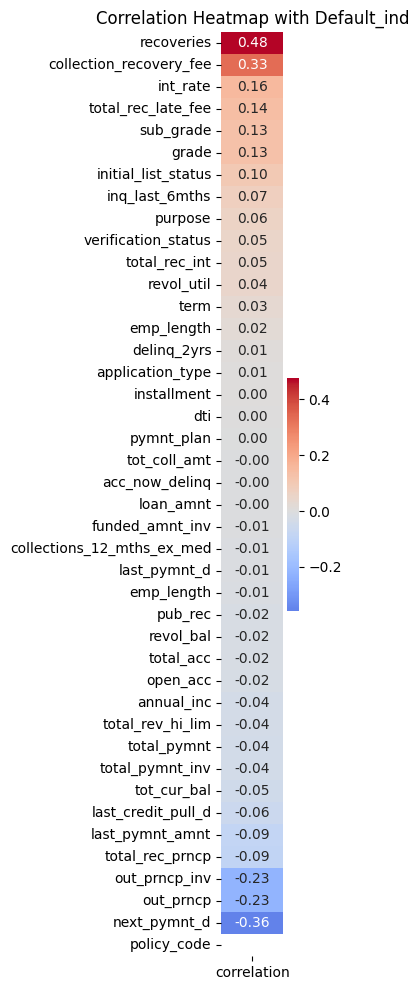

In [38]:
# HEATMAP OF CORRELATIONS
# Step 1: Create a new DataFrame with the combined correlation values
correlation_df = pd.DataFrame({'correlation': all_correlations})

# Step 2: Create a Seaborn heatmap to visualize the correlation matrix
plt.figure(figsize=(1, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap with Default_ind')
plt.show()

In [52]:
# ORIGINAL HEAT MAP:
# show heatmap of correlation with default_ind
plt.figure(figsize=(1, 12))
sns.heatmap(df.corr()[['default_ind']].sort_values('default_ind'), annot=True, cmap='coolwarm')


ValueError: could not convert string to float: ' 36 months'

<Figure size 100x1200 with 0 Axes>

### Other visualisations

References:

In [40]:
# Select a subset of columns (e.g., the first 5 columns) for visualization
# subset_columns = df.iloc[:, :5]

# Create the pair plot for the selected subset of columns
# sns.pairplot(subset_columns)
# plt.show()

## b) Prepare the data for machine learning algorithms

### 1. Choose correlated columns to use for machine learning
Possible choices for columns:
- grade                         0.123656 (categorical)
- sub_grade                     0.126028 (categorical)
- total_rec_late_fee            0.140760 (continuous)
- int_rate                      0.155037 (continuous)
- collection_recovery_fee       0.330764 (continuous)
- recoveries                    0.475738 (continuous)

- next_pymnt_d                 -0.356126 (categorical)
- out_prncp                    -0.225960 (continuous)
- out_prncp_inv                -0.225959 (continuous)
- member_id                    -0.220181 (continuous)
- zid*                          -0.219832 (continuous)
- issue_d                      -0.206522 (categorical)

\* kinda doubt for zid since its random 

### 2. Create custom transformer:
We would want to:
- Drop ID columns (id, member_id)
- Deal with missing data:
   - Remove Nulls (Columns > 50%)
   - Median impute (SimpleImputer)
- Encode columns (was thinking of using sklearn's ordinal encoder so don't have to do many cells/long code to encode)
- Scale the data (StandardScaler)

## Preprocessing Pipeline 

- Make copy of original dataframe 
- Drop ID columns (id, member_id, emp_title, title, zip_code, desc) 
- Deal with missing data 
    - Remove mostly-null columns (cols with >50% missing data)
    - Median impute (via SimpleImputer)
- OneHotEncode categorical (nominal) columns; ordinal for categorical (ordinal) data  
- Scale data (via StandardScaler)

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.num_imputer = SimpleImputer(strategy="median")
        self.cat_imputer = SimpleImputer(strategy="most_frequent")
        self.oneHot_encoder = OneHotEncoder(handle_unknown='ignore')
        self.ordinal_encoder = OrdinalEncoder()
        self.scaler = StandardScaler()

        # Categorical columns
        self.cat_cols = None
        self.ord_cols = None

        # Numerical columns
        self.num_cols = None

    def drop_rdnt_columns(self, X):
        # Drop redundant columns
        return X.drop(['zid', 'member_id', 'emp_title', 'title', 'zip_code', 'desc'], axis=1)
    
    def drop_mostly_emp_columns(self, X):
        # Drop columns with >50% missing values
        cols_to_drop = X.columns[X.isnull().mean() > 0.5]
        return X.drop(cols_to_drop, axis=1, inplace=True)
    
    def fit(self, X, y=None):
        # Find categorical and numeric columns
        self.cat_cols = X.select_dtypes(include='object').columns.tolist()
        self.num_cols = X.select_dtypes(include='number').columns.tolist()

        # List of ordinal columns
        self.ord_cols = ['emp_length', 'grade', 'sub_grade']

        # Remove ordinal columns from categorical columns
        self.cat_cols = [col for col in self.cat_cols if col not in self.ord_cols]

        # print categorical and numeric columns
        print("Categorical (nominal) columns: ", self.cat_cols)
        print("Numeric columns: ", self.num_cols)
        
        # Fill missing values for numerical columns
        X[self.num_cols] = self.num_imputer.fit_transform(X[self.num_cols])
        # Fill missing values for ordinal columns
        X[self.ord_cols] = self.cat_imputer.fit_transform(X[self.ord_cols])
        # Fill missing values for categorical (nominal) columns
        X[self.cat_cols] = self.cat_imputer.fit_transform(X[self.cat_cols])

        # fit the encoder for nominal columns
        self.oneHot_encoder.fit(X[self.cat_cols])
        # fit the ordinal encoder
        self.ordinal_encoder.fit(X[self.ord_cols])
        # Fit the StandardScaler
        self.scaler.fit(X[self.num_cols])
        
        return self
    
    def transform(self, X, y=None):
        # Impute missing data in numeric columns
        X[self.num_cols] = self.num_imputer.transform(X[self.num_cols])
        
        # One-hot encode categorical columns
        categorical_data = self.oneHot_encoder.transform(X[self.cat_cols]).toarray()
        X = X.drop(columns=self.cat_cols)
        X = pd.concat([X, pd.DataFrame(categorical_data, columns=self.oneHot_encoder.get_feature_names_out(self.cat_cols))], axis=1)
        
        # Ordinal encode ordinal columns
        X[self.ord_cols] = self.ordinal_encoder.transform(X[self.ord_cols])

        # Scale numeric data
        X[self.num_cols] = self.scaler.transform(X[self.num_cols])
        
        return X
    
    def fit_transform(self, X, y=None):
        # Drop columns and remove mostly-null columns before fitting and transforming 
        X = self.drop_rdnt_columns(X)
        self.drop_mostly_emp_columns(X)
        
        return self.fit(X, y).transform(X, y)

## Admin stuff befeore we start
- Import the data
- Change the values of 'term' column into int type
- Change all the dates from str to datetime type

In [42]:
# Specify the data types for columns with mixed types
dtype_dict = {'pymnt_plan': 'str', 'last_pymnt_amnt': 'float', 'dti_joint': 'float'}

# Import the CSV file with specified data types
df = pd.read_csv('data.csv', dtype=dtype_dict)

# Change the values of 'term' into integers
df['term'] = df['term'].str.replace('months', '').astype(int)

# Chnage the type of 'issue_d' to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'])
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])

/var/folders/bt/vkg37vm51db7424mjftzw2700000gn/T/ipykernel_12323/2552001633.py:7: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', dtype=dtype_dict)


In [43]:
# Transforming data with a custom transformer

# Instantiate and use the CustomTransformer
transformer = CustomTransformer()

X = df.drop(columns=['default_ind'])  # Features
y = df['default_ind']  # Target column

# Fit and transform the data
df = transformer.fit_transform(X, y)


Categorical (nominal) columns:  ['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type']
Numeric columns:  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [44]:
df.head() 


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,-1.156698,-1.155938,-1.154200,-0.652755,-0.581985,-1.121617,1.0,6.0,1.0,-0.794704,2011-01-12,0.546834,-0.363538,1985-01-01,0.330990,-1.609326,-0.334495,-0.146804,1.204776,-1.376554,-0.97907,-0.979069,-0.226595,-0.227065,-0.127440,-0.429447,-0.088527,-0.113981,-0.079247,2015-01-01,-0.422278,NaT,2016-01-01,-0.106423,0.0,-0.063932,-0.020627,-0.3643,-0.212535,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.453422,-1.452869,-1.447941,1.531967,0.475620,-1.544386,2.0,13.0,10.0,-0.701340,2011-01-12,-0.982699,-0.363538,1999-01-04,4.480228,-1.609326,-0.334495,-0.685012,-1.916368,-1.799608,-0.97907,-0.979069,-0.840090,-0.838730,-0.807977,-0.634040,-0.088527,0.169413,-0.061481,2013-01-04,-0.432958,NaT,2013-01-09,-0.106423,0.0,-0.063932,-0.020627,-0.3643,-0.212535,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.465291,-1.464746,-1.459809,-0.652755,0.633574,-1.443863,2.0,14.0,1.0,-0.977511,2011-01-12,-0.539622,-0.363538,2001-01-11,1.368299,-1.797718,-0.334495,-0.627911,1.826484,-1.291944,-0.97907,-0.979069,-0.587864,-0.585730,-0.516871,-0.553106,-0.088527,-0.113981,-0.079247,2014-01-06,-0.323964,NaT,2016-01-01,-0.106423,0.0,-0.063932,-0.020627,-0.3643,-0.212535,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.563250,-0.562076,-0.557818,-0.652755,0.068145,-0.397692,2.0,10.0,1.0,-0.402574,2011-01-12,0.107775,-0.363538,1996-01-02,0.330990,-

In [45]:
pd.set_option('display.max_columns', None)

df.isnull().sum()


loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
                              ..
addr_state_WY                  0
initial_list_status_f          0
initial_list_status_w          0
application_type_INDIVIDUAL    0
application_type_JOINT         0
Length: 119, dtype: int64

In [46]:
# Load your data into a DataFrame
df = pd.read_csv('data.csv')
print(df.shape)

# Instantiate the CustomTransformer class
transformer = CustomTransformer()

# Apply drop_columns method
processed_df = transformer.drop_rdnt_columns(df)

# Apply drop_mostly_emp_columns method
transformer.drop_mostly_emp_columns(processed_df)

# Check shape of the DataFrame
print(processed_df.shape)

/var/folders/bt/vkg37vm51db7424mjftzw2700000gn/T/ipykernel_12323/1519171679.py:3: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


(855969, 73)
(855969, 47)


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
df = pd.read_csv('data.csv')
print(df.shape)

# Separate features (X) and the target column (y)
X = df.drop(columns=['default_ind'])  # Features
y = df['default_ind']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

/var/folders/bt/vkg37vm51db7424mjftzw2700000gn/T/ipykernel_12323/585965602.py:5: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


(855969, 73)
shape of X_train:  (684775, 72)
shape of X_test:  (171194, 72)
shape of y_train:  (684775,)
shape of y_test:  (171194,)


## Correlation, 
## pick out features, 
## modeling 
## Fine Tune 
## Eval

## Declaring top 10 (absolute) values to train our models:

In [48]:
# 1) Chose top 5 correlated features to be used as input for models (for now)

features = ['recoveries', 'collection_recovery_fee', 
            'int_rate', 'total_rec_late_fee', 'sub_grade', 'grade', 'initial_list_status', 'out_prncp_inv', 'out_prncp', 'next_pymnt_d']


## Train-Test Split

In [51]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessed X_train_transformed and X_test_transformed ready for model training/testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(684775, 72)
(171194, 72)
(684775,)
(171194,)


## DO OUR MODELS HERE :)))